# Many Flips

This was such a tricky question that it needed a deep dive in to the concept before trying to answer the questions. 

**Note:** I have created this with emphasis on visualizing, so as to understand bigger picture better. However due to lack of time, I have not sufficiently modularized, please ignore the code, if its is daunting or unreadable, it is not essential and focus only on output as the target here is mainly to understand the concepts. 

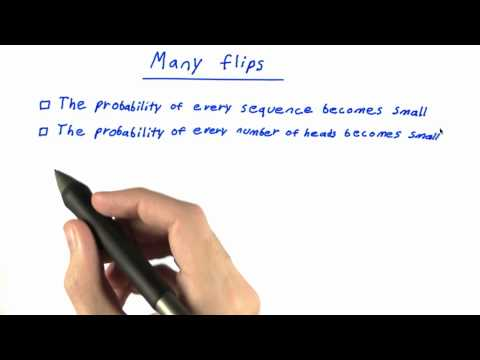

In [1]:
# just a helper function for easier youtube call
def strip_url(url):
    return url.replace('https://youtu.be/','')

from IPython.display import YouTubeVideo
url = 'https://youtu.be/MwcRx5uXICM'
YouTubeVideo(strip_url(url))

### 3 Flips  

Let us visualize and comprehend first the probability concept for 3 flips. 

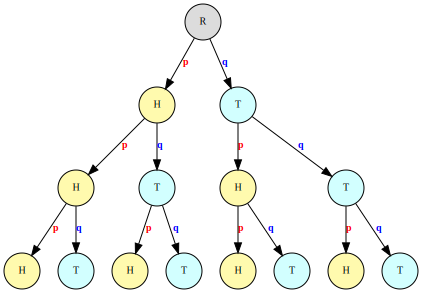

In [2]:
from graphviz import Digraph
from coinflipviz import draw_graph, get_combinations, get_combinations_consolidated, plot_combinations_consolidated

n_flips = 3

g = Digraph()
g = draw_graph(g, n_flips)
g

Each flow from Root to end, is a possibility of a sequence. For eg, on left most of tree, we have a sequence HHH, 3 heads in all 3 flips. This terminology is important. Each sequence may have any number of heads or nothing at all. Let us check, what are all the possible sequences from 3 flips and no of heads in each of those sequences.  

In [3]:
combi_df = get_combinations(n_flips)
combi_df

,sequence,x
0,HHH,3
1,HHT,2
2,HTH,2
3,HTT,1
4,THH,2
5,THT,1
6,TTH,1
7,TTT,0


As you might have guessed, the no of sequence depends on no of flips n. 

$$
\text {No of sequences} =  2^n , \text {where n is no of flips}
$$  

Let us check, the statistics of how many heads occur in each sequence, and count them. 

In [4]:
final_df = get_combinations_consolidated(n_flips)
final_df

,x,n(x),p(x)
0,0,1,0.125
1,1,3,0.375
2,2,3,0.375
3,3,1,0.125


So for 3 flips, we have a **distribution** of no of heads in sequences, and thus their associated probability as well. If we try to graph them, we get something like below. 

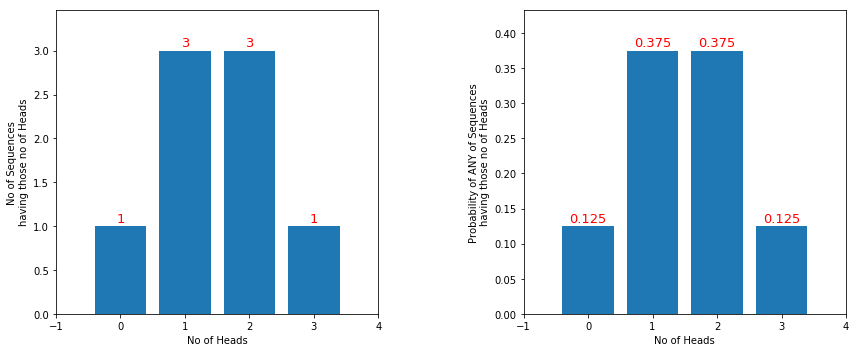

In [5]:
plot_combinations_consolidated(final_df)

It is important to understand the above graph very well. For instance, on LHS, when X=1, it means, there are 3 sequences with 1 head, and we could calculate its probability as $\dfrac {3}{2^3}=0.375$ which is shown on RHS. Note the nature of the graph. Let us try again for 4 flips. 

### 4 Flips

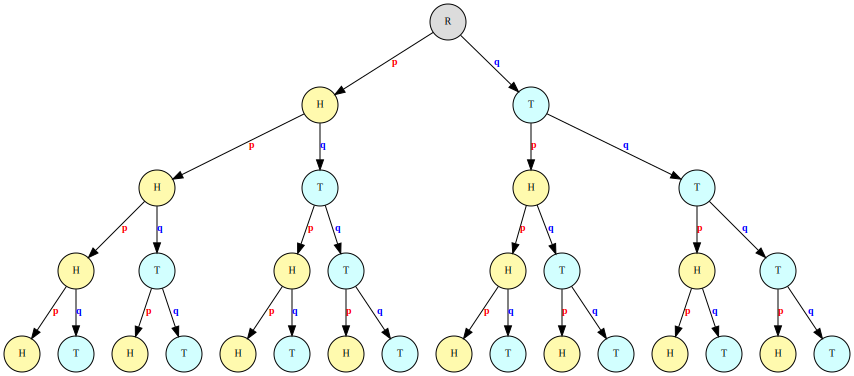

In [6]:
n_flips = 4

g = Digraph()
g = draw_graph(g, n_flips)
g

In [7]:
combi_df = get_combinations(n_flips)
combi_df

,sequence,x
0,HHHH,4
1,HHHT,3
2,HHTH,3
3,HHTT,2
4,HTHH,3
5,HTHT,2
6,HTTH,2
7,HTTT,1
8,THHH,3
9,THHT,2


In [8]:
final_df = get_combinations_consolidated(n_flips)
final_df

,x,n(x),p(x)
0,0,1,0.0625
1,1,4,0.2500
2,2,6,0.3750
3,3,4,0.2500
4,4,1,0.0625


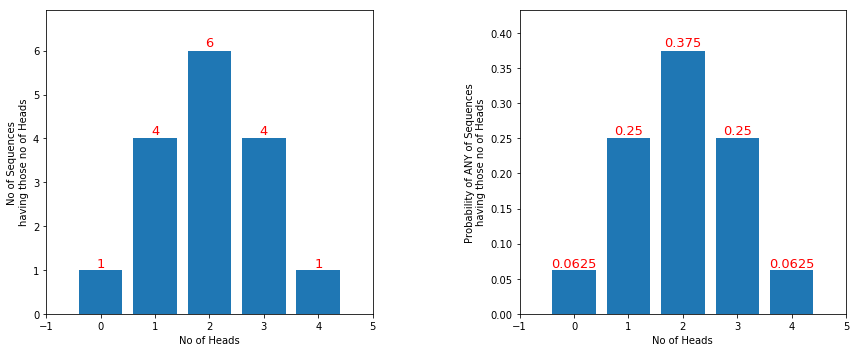

In [9]:
plot_combinations_consolidated(final_df)

Now you see, where the graph goes as n increases? This is **binomial distribution**. Let us put aside formula and definition for a while and only focus on the nature of these graphs. 

### What happens when flips increase? 

Let us find out by a small animation

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from coinflipviz import autolabel, autoformat

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.close()

def animate_combinations_consolidated(df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
def animate(i):
    
    ax1.clear()
    ax2.clear()
        
    fig.suptitle('No of flips  :  {}'.format(i), fontsize=14)
    temp_df = get_combinations_consolidated(i)
    animate_combinations_consolidated(temp_df)

    
n_flips = 10
ani = animation.FuncAnimation(fig, animate, np.arange(1, n_flips+1), interval=1000)


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)    
from IPython.display import HTML
HTML(ani.to_html5_video())

1. Note that as we increase the no of flips, the graphs above approximate to a Guassian like structure. 
2. Maximum number of heads is always for half the number of flips. That is, if n = 10, then x = 5, that is sequence having 5 heads, has maximum probability. This is well observed, when n=even 

The above graphical depictions would be very helpful to answer the quizes as we would see below. 

### Pascal's triangle

The numbers on the LHS, the n(x), interestingly are the same as in Pascal's triangle, where the row corresponds to the no of flips.  

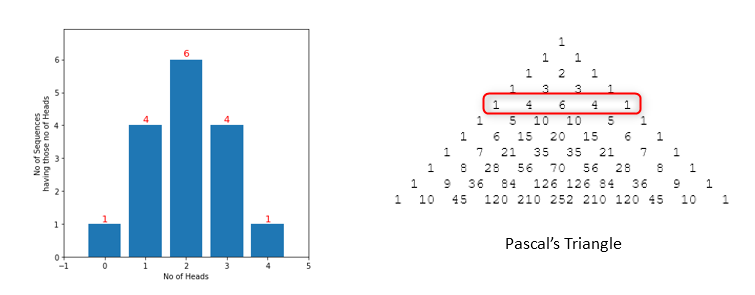

These numbers are called binomial coefficients. That is, the No of sequences we get on LHS, are binomial co efficients. Pascal's triangle is made up of binomial co oefficients. 

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">So for any number of flips x, one could of course look at the respective row in Pascal's triagle to get n(x) easily. </div>  



## Quiz Answers

### 1. The Probability of every Sequence becomes Small  - True or False? 

Let us take an example. Say, no of flips = 4, Then

$$
\text {Total No of sequences} = 2^4 = 16 \\ \\
\text {Probability of any single sequence} = \dfrac {\text {No of that sequence}}{\text {Total No of sequences}} = \dfrac {1}{16} = 0.0625
$$

Generalizing, for any no of flips **n**, 
$$
\text {Total No of sequences} = 2^n \\ \\
\text {Probability of any single sequence} = \dfrac {\text {No of that sequence}}{\text {Total No of sequences}} = \dfrac {1}{2^n}
$$

Obviously, as **n** increases, $\dfrac {1}{2^n}$ decreases. 

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Thus, as <b>n</b> increases, the probability of every Sequence becomes small. So its True
</div>

### 2. The probability of every number of heads becomes small - True or False? 

Let no of flips = 4, 
Let us take specific number of heads, say, X = 2 (3 heads). Let us observe, what happens to X = 2, when n increases in below animation directly

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from coinflipviz import autolabel, autoformat

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.close()

def animate_combinations_consolidated(df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)
    
    # highlight X = 2
    if len(rects) > 2:
        rects[2].set_color('r')
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
def animate(i):
    
    ax1.clear()
    ax2.clear()
        
    fig.suptitle('No of flips  :  {}     Red  : (X=2)'.format(i), fontsize=14)
    temp_df = get_combinations_consolidated(i)
    animate_combinations_consolidated(temp_df)

    
n_flips = 10
ani = animation.FuncAnimation(fig, animate, np.arange(1, n_flips+1), interval=1000)


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)    
from IPython.display import HTML
HTML(ani.to_html5_video())

So even though, initially it increased from 0.25 (for n=2), to 0.375 (n=3), thereafter it reduces and approaches to zero as can be seen on above animation. 

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Thus, as <b>n</b> increases, the probability of every number of heads become small. So its true
</div><br>

### 3. The probability of every proportion of heads becomes Small. True or False?  

Let n = 4, 

#### Let X = 50% of n. 

Now this does not make sense for odd no of **n**, because then X would be non integer. For eg, if I have 5 flips, then X cannot be 2.5 heads! So we will check for only even no of flips. 

#### Note: 
Graph's y axis limits are maintained at constant, just to illustrate the reducing nature of probabilities. This had been the case all along, only that earlier, the y axis was auto scaling so reducing nature was only obvious from carefully observing numbers. 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from coinflipviz import autolabel, autoformat

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.close()

def animate_combinations_consolidated(i, df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)        
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
    # highlight X corresponding to 50% of no of flips
    if ((i) % 2) == 0:  # if only even, 
        y = int(i/2)    
        if len(rects) > 2:
            #print(y)
            rects[y].set_color('r')    
                        
    # also set y limit to keep the scale constant to view the effect as n increases
    ymin = ax2.get_ylim()[0]
    ymax = 0.5*1.1  # increase space to insert bar value and assuming we will not cross 0.5 prob ever
    ax2.set_ylim([ymin,ymax])     
    ymin = ax1.get_ylim()[0]
    ymax = 260*1.1  # just hardcoding for this example. MODIFY THIS IF YOU CHANGE N_FLIPS
    ax1.set_ylim([ymin,ymax])         
    
    
def animate(i):
    
    ax1.clear()
    ax2.clear()
        
    fig.suptitle('No of flips  :  {}    Red X = 50% of No of flips'.format(i), fontsize=14)
    temp_df = get_combinations_consolidated(i)
    animate_combinations_consolidated(i, temp_df)

    
n_flips = 10
ani = animation.FuncAnimation(fig, animate, np.arange(1, n_flips+1), interval=1000)


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)    
from IPython.display import HTML
HTML(ani.to_html5_video())

From RHS graph, one could easily observe that the maximum probability that could occur (at $X = \dfrac {n}{2}$) for any **n** decreases, as **n** increases. 

Since the max probability is reducing, it is also obvious, for any other X it would still reduce, which can also be observed from other adjacent blue bars from above RHS graph.  

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Thus, as <b>n</b> increases, <b>X = any % of n</b> decreases. So this is also True. 
</div><br>

### 4. The probability of every range of proportions becomes small - True or False? 

We will prove this by taking the exceptional case, where it is False. This is difficult to observe at first, as there are wide range of proportions possible, but once we understand the nature of the "Gaussian" like curve of probabilities, it would be easier to comprehend.  

Note the phrase **range of proportions**. This means, from any % of n to any other % of n. The exceptional case we take up to argue its falseness is, 

#### $X \leq 50\%$ of n

Suppose, n = 5, then $X \leq \dfrac {5}{2} = X \leq 2.5$, thus X = 0, 1, 2

We should then find

$$
p(X \leq 2.5) = p(X = 0) + p(X = 1) + p(X = 2)
$$

Note also that, for n = even, we cannot accurately divide 50%, as a fair share of probability goes to middle X=50% case (just like we saw earlier), so for this case, we will take only X = odd to prove our point.  

This partiality does not matter, as n tends to go infinity, we get a smooth guassian like density function, and we just take area for range of X, instead of individual bars as of now.  

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from coinflipviz import autolabel, autoformat

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.close()

def animate_combinations_consolidated(i, df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)        
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    
    # highlight X corresponding to 50% of no of flips
    if (i % 2) == 0:  
        pass
    else: # if only odd
        from math import floor
        i_50_range = int(i/2) 
        for each_bar in range(0, i_50_range+1):
            rects[each_bar].set_color('r')  
            ax2.text(-1,0.52,'  Red Area: 0.5', fontsize=12)
                        
    # also set y limit to keep the scale constant to view the effect as n increases
    ymin = ax2.get_ylim()[0]
    ymax = 0.5*1.1  # increase space to insert bar value and assuming we will not cross 0.5 prob ever
    ax2.set_ylim([ymin,ymax])     
    ymin = ax1.get_ylim()[0]
    ymax = 260*1.1  # just hardcoding for this example. MODIFY THIS IF YOU CHANGE N_FLIPS
    ax1.set_ylim([ymin,ymax])         
    
    
def animate(i):
    
    ax1.clear()
    ax2.clear()
        
    fig.suptitle('No of flips  :  {}    Red X <= 50% of No of flips'.format(i), fontsize=14)
    temp_df = get_combinations_consolidated(i)
    animate_combinations_consolidated(i, temp_df)

    
n_flips = 10
ani = animation.FuncAnimation(fig, animate, np.arange(1, n_flips+1), interval=1000)


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)    
from IPython.display import HTML
HTML(ani.to_html5_video())

From RHS graph, pause for every odd no of flips, and try calculating sum of red bar values. It would always be 0.5.  

$
n = 1,\  X \leq (1)(0.5),\  p(X \leq 0)\  = \ p(X = 0) \ = \ 0.5 \\ \\
n = 3,\  X \leq (3)(0.5), \  p(X \leq 1)\  = \ p(X = 0) \ + p(X = 1)\ = \ 0.125 + 0.375 = 0.5 \\ \\
n = 5,\  X \leq (5)(0.5), \  p(X \leq 2)\  = \ p(X = 0) \ + p(X = 1)\ + p(X=2)\ = \ 0.03125+0.15625+0.31250 = 0.5 \\ \\
n = 7,\  X \leq (7)(0.5), \  p(X \leq 3)\  = \ p(X = 0) \ + p(X = 1)\ + p(X=2)\ + p(X=3)\ = \ 0.00781+0.05468+0.16406+0.2734375 = 0.5 \\ \\
n = 9,\  X \leq (9)(0.5), \  p(X \leq 4)\  = \ p(X = 0) \ + p(X = 1)\ + p(X=2)\ + p(X=3)\ + p(X=4)\ = \ 0.001953+0.017578125+0.0703125+0.1640625+0.24609375= 0.5 \\ \\
$

This is a typical charactersitic of such a distribution. This could be extended that, as n approaches $\infty$, the smooth probability curve we get, always have half of its area to be of 0.5 probability. This makes sense, after all, total probability (total area of the curve) should be 1, and it is symmetrical (as you can see how it is growing), so one could easily infer, half of it would be having 50% probability. 

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">Thus, since the total probability remains constant at 0.5 for X $\leq$ 50% of n, <b>not every range of proportions</b> has probability reduces as n increases. So this statement is <b>False</b> </div><br> 

### 5. The probability of some ranges of proportions becomes small - True or False? 

What if our range of proportions is itself, less than or more than 50%?  Let us find out for 33% (to be inline with [goldsong](https://gist.github.com/parthi2929/2b0fc593cd8bccf99a6c4ae1ccb60005)'s explanation. 

#### $X \leq 33\%$ of n

Earlier we chose odd X, because, we were able to find X the sum of which wholly satisfied our < 50% criteria. In this case, it is tricky. It would be evident, when we plot 33% of n values in a table. 

In [14]:
import pandas as pd

cols = ['n_flips', 'n_33_range', 'floored_x', 'ceiled_x']

df = pd.DataFrame(columns=cols)

def yellow(val):
    color = 'yellow'
    return 'background-color: %s' % color

for i in range(1, 11):  # 10 flips
    n_flips = i
    n_33_range = i*0.33
    floored_x = int(i*0.33)
    from math import ceil
    ceiled_x = int(ceil(i*0.33))
    df = df.append({'n_flips' : n_flips, 'n_33_range' : n_33_range, 'floored_x' : floored_x, 'ceiled_x': ceiled_x}, ignore_index=True)
    
df[['n_flips','floored_x','ceiled_x']] = df[['n_flips','floored_x','ceiled_x']].astype(int)
df = df.astype(object).T  # ref: https://stackoverflow.com/questions/47907195/pandas-transpose-resets-decimal-rounding

#list(df.columns.values)
df.style.applymap(yellow, subset=pd.IndexSlice[:,[2,5,8]])

,0,1,2,3,4,5,6,7,8,9
n_flips,1,2,3,4,5,6,7,8,9,10
n_33_range,0.33,0.66,0.99,1.32,1.65,1.98,2.31,2.64,2.97,3.3
floored_x,0,0,0,1,1,1,2,2,2,3
ceiled_x,1,1,1,2,2,2,3,3,3,4


Observe that, when no of flips = 3, 6, 9, etc, as highlighted, we have 33% of n as a whole number (to observe equivalent no of heads). 

For example,  

When n_flips = 3, n_33_range = 0.99 $\cong$ 1, so X = 1 could almost wholly represent 33% of n_flips  
When n_flips = 6, n_33_range = 1.98 $\cong$ 2, so X = 2 could almost wholly represent 33% of n_flips  
When n_flips = 9, n_33_range = 2.97 $\cong$ 3, so X = 3 could almost wholly represent 33% of n_flips  

However, for other values of n_flips, picking up floor or ceiled value would leave gaps introducing undesired errors that could screw up our observation.  

For example, 

When n_flips = 2, n_33_range = 0.66, so neither X = 0 or X = 1 is good approximation to be taken for observation.  

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">
Thus, in this case, we will calculate total area of 33% of n_flips, only when n_flips is at multiples of 3.  If we have 10 flips, we could thus calculate at 3rd flip, 6th flip, 9th flip and observe if total area at those flips increase or decrease.</div>  

Also note, ceiled value of n_33_range, serves better than floored value unlike earlier cases.   

Visualizing for 33%.. (n_flips increased to 12, to have one more multiple of 3 datapoint)

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from coinflipviz import autolabel, autoformat

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
plt.close()

def animate_combinations_consolidated(i, df, fontsize=10):
    """
    Given the dataframe with x, n(x), p(x) this provides two plots:
    x vs n(x)
    x vs p(x)
    """
    
    X = df['x'].tolist()
    N = df['n(x)'].tolist()
    P = df['p(x)'].tolist()
    
    rects = ax1.bar(X, N)
    autolabel(ax1, rects, fontsize)
    
    xlabel = 'No of Heads'
    ylabel = 'No of Sequences\nhaving those no of Heads'   
    autoformat(ax1, xlabel, ylabel, fontsize)
    

    rects = ax2.bar(X, P)
    autolabel(ax2, rects, fontsize)        
    
    ylabel = 'Probability of ANY of Sequences\nhaving those no of Heads'   
    autoformat(ax2, xlabel, ylabel, fontsize)
    

    # highlight X corresponding to 50% of no of flips
    if (i % 3) == 0:  # only if multiple of 3 as reasoned earlier

        from math import ceil
        i_33_range = int(ceil(i*0.33))  # ceiled value serves better in our case
        red_area = 0
        for each_bar in range(0, i_33_range+1):
            rect = rects[each_bar]
            rect.set_color('r')  
            red_area += rect.get_height()
            
        ax2.text(-1,0.52,'  Red Area : {}'.format(red_area), fontsize=12)
                        
    # also set y limit to keep the scale constant to view the effect as n increases
    ymin = ax2.get_ylim()[0]
    ymax = 0.5*1.1  # increase space to insert bar value and assuming we will not cross 0.5 prob ever
    ax2.set_ylim([ymin,ymax])     
    ymin = ax1.get_ylim()[0]
    ymax = 950*1.1  # just hardcoding for this example. MODIFY THIS IF YOU CHANGE N_FLIPS
    ax1.set_ylim([ymin,ymax])         
    
    
def animate(i):
    
    ax1.clear()
    ax2.clear()
        
    fig.suptitle('No of flips  :  {}    Red X <= 33% of No of flips'.format(i), fontsize=14)
    temp_df = get_combinations_consolidated(i)
    animate_combinations_consolidated(i, temp_df)

    
n_flips = 12
ani = animation.FuncAnimation(fig, animate, np.arange(1, n_flips+1), interval=1000)


plt.tight_layout()
plt.subplots_adjust(wspace=0.5)    
from IPython.display import HTML
HTML(ani.to_html5_video())

Thus, you could observe from graph that, 

$
\small {
n = 3,\  X \leq (3)(0.33),\  p(X \leq 0.99)\  \cong p(X \leq 1)\ = p(X=0) + p(X=1) = 0.125+0.375 = 0.5  \\ \\  
n = 6,\  X \leq (6)(0.33), \  p(X \leq 1.98)\ \cong p(X \leq 2)\ = p(X=0) + p(X=1) + p(X=2) =  0.01562+0.09375+0.234375 = 0.344 \\ \\  
n = 9,\  X \leq (9)(0.33), \  p(X \leq 2.97)\  \cong p(X \leq 3)\ =  p(X=0) + p(X=1) + p(X=2) +p(X=3) = \\ \\
0.001953125 + 0.017578125 + 0.0703125 + 0.1640625 = 0.2539 \\ \\  
n = 12,\  X \leq (12)(0.33), \  p(X \leq 3.96)\  \cong p(X \leq 4)\ = p(X=0) + p(X=1) + p(X=2) +p(X=3) + p(X=4) = \\ \\ 
\dfrac {1}{2^{12}} + \dfrac {12}{2^{12}} + \dfrac {66}{2^{12}} + \dfrac {220}{2^{12}} + \dfrac {495}{2^{12}} = 0.00024414062 + 0.0029296875 + 0.01611328125 + 0.053710937 + 0.12084960937 = 0.19384765574
}
$



Thus, as you could see, for X $\leq$ 33% of n, the probability decreases as n increases. 

<br><div style="background-color:'#E3F2FD;  padding: 10px 10px 10px 10px;">So, yes, for some ranges, the probabilities decrease as <b>n</b> increases. So it is <b>True</b>. 
</div><br>

### Note: 

Take care trying more number of flips with above snippets. They are not efficient, and thus time sensitive. The nature of our problem is, the numbers grow exponentially, so the PC might have for long time, even for n greater than 15.  